In [1]:
#library import
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

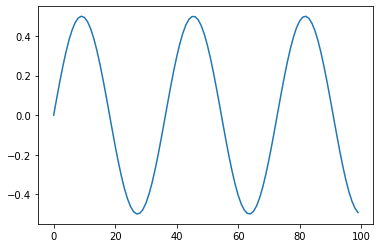

In [7]:
#sine wave
"""
원운동의 순간 각속도와 같다. 초당 몇 도를 돌고있는가
위상 :  원운동의 현재 각도
주파수 : 자신의 위상이 얼마나 빨리 바뀌는가
Amplitude = A_m * sin(wt) 
A : 진폭, 진폭의 최대최소 1, -1, w : 각속도, t : 시간

"""

frequency = 440 #Hz 단위 주파수
amplitude = 0.5 #digital audio signal 표현할때 최대 최소가 -1 ~ 1 사이
duration = 3 #길이를 초로 표현(sec)
sample_rate = 16000 #(samples / sec) 초당 샘플 수

#3초에 해당하는 샘플의 수
total_number_samples = duration * sample_rate

#np.arange() : 시작 ~ 끝 지점까지 나열
time_frame = np.arange(total_number_samples)

#time frame to second
time_frame_in_sec = time_frame / sample_rate #(sample) * (sec/sample)
#sin (각속도(freq) * time)
sine_wave = np.sin(2 * np.pi * (frequency * time_frame_in_sec)) *amplitude
# freq(period / sec) * time(second) : 몇 주기를 1초에 생성하는지
# 주어진 시간 동안 몇 번 주기를 반복(몇바퀴 회전?)
# 한바퀴 회전을 radian으로 표현하면 2*pi

plt.plot(sine_wave[:100])

In [8]:
ipd.Audio(sine_wave, rate = sample_rate)

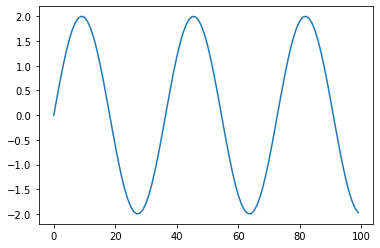

In [10]:
sine_wave = 2 * np.sin(2 * np.pi * (frequency * time_frame_in_sec))
plt.plot(sine_wave[:100])

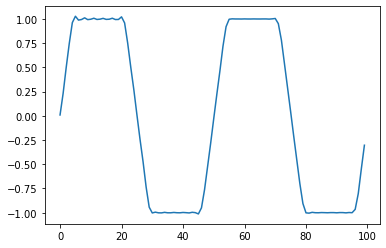

In [11]:
import soundfile as sf
sf.write('clipping.wav', data=sine_wave, samplerate=sample_rate)
sine_wave, sr = librosa.load('clipping.wav')
ipd.display(ipd.Audio(sine_wave, rate=sample_rate))
plt.plot(sine_wave[:100])

In [13]:
#make sine wave as function
def make_sine_wave(freq, amp, dur, sr=16000):
  """
  input : frequency, amplitude, duration, sample_rate
  output : 1-dim sample array
  """
  time_frame = np.arange(sr * dur)
  time_frame_in_sec = time_frame / sample_rate
  sine_wave = np.sin(2*np.pi * (freq * time_frame_in_sec)) * amp

  return sine_wave

output = make_sine_wave(880, 0.7, 5)
ipd.Audio(output, rate=sample_rate)

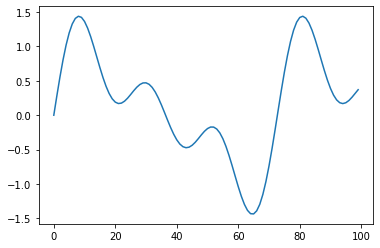

In [14]:
fund = make_sine_wave(220, 0.8, 3)
harmonic_1 = make_sine_wave(220 * 2, 0.5, 3)
harmonic_2 = make_sine_wave(220 * 3, 0.5, 3)

combine = fund + harmonic_1 + harmonic_2
plt.plot(combine[:100])
ipd.Audio(combine, rate = sample_rate)

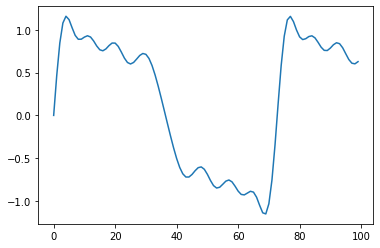

In [21]:
import random

num_harmonics = 10
fund_freq = 220
fund = make_sine_wave(fund_freq, 1, 3)
for i in range(2, num_harmonics):
  harmonics = make_sine_wave(fund_freq * i, random.random()/i, 3)
  fund += harmonics

plt.plot(fund[:100])
ipd.Audio(fund, rate = sample_rate) 

## 클래스란 무엇인가
- 클래스 정의하기
- 클래스 attribute
- 클래스 method

In [27]:
def make_wave_with_harmonics(fund_freq, num_harm):
  fund = make_sine_wave(fund_freq, 1, 3)
  for i in range(2, num_harm):
    harm = make_sine_wave(fund_freq * i, random.random()/i, 3 )
    fund += harm
  return fund

first_output = make_wave_with_harmonics(330, 15)
ipd.Audio(first_output, rate = sample_rate)

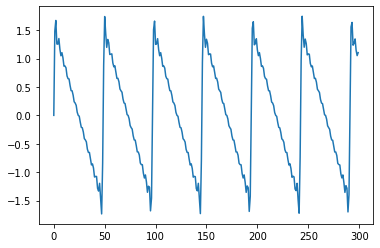

In [28]:
def make_sawtooth_wave(fund_freq, num_harm):
  fund = make_sine_wave(fund_freq, 1, 3)
  for i in range(2, num_harm):
    harm = make_sine_wave(fund_freq * i, 1/i, 3 )
    fund += harm
  return fund

sawtooth_output = make_sawtooth_wave(330, 15)
ipd.Audio(sawtooth_output, rate = sample_rate)
plt.plot(sawtooth_output[:300])

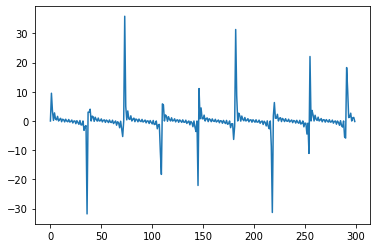

In [32]:
class Oscilator:
  def __init__(self, frequency, amplitude = 1, sample_rate = 16000):
    #self 의미 : attribute
    self.frequency = frequency
    self.amplitude = amplitude
    self.sample_rate = sample_rate

  def generate(self, duration):
    return make_sine_wave(self.frequency, self.amplitude, duration, sr=self.sample_rate)

  def generate_with_harmonics(self, duration):
    fund = make_sine_wave(self.frequency, self.amplitude, 3)
    for i in range(2, 50):
      harm = make_sine_wave(self.frequency * i, self.calculate_harmonics_amplitude(i), 3 )
      fund += harm
    return fund

  def calculate_harmonics_amplitude(self, idx):
    return self.amplitude

oscil_a = Oscilator(440)
output = oscil_a.generate_with_harmonics(5)
ipd.display(ipd.Audio(output, rate = oscil_a.sample_rate))
plt.plot(output[:300])


In [35]:
#부모 클래스 상속 받기
class RandOscilator(Oscilator):
  def __init__(self, freq, amp, sr):
    super().__init__(freq, amp, sr)

  def calculate_harmonics_amplitude(self, idx):
    return random.random()

rand_oscil = RandOscilator(440, 0.3, 16000)
ipd.Audio(rand_oscil.generate_with_harmonics(4), rate = rand_oscil.sample_rate)


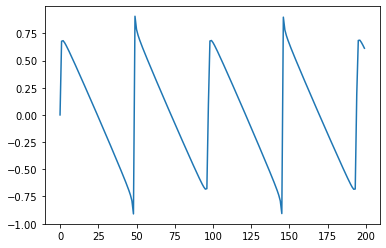

In [37]:
class SawOscilator(Oscilator):
  def __init__(self, freq, amp, sr):
    super().__init__(freq, amp, sr)

  def calculate_harmonics_amplitude(self, idx):
    return self.amplitude / idx

saw_oscil = SawOscilator(330, 0.5, 16000)
saw_wave = saw_oscil.generate_with_harmonics(2)
ipd.display(ipd.Audio(saw_wave, rate = saw_oscil.sample_rate))
plt.plot(saw_wave[:200])